<a href="https://colab.research.google.com/github/raju-prudhvi/BA-820-Group15/blob/main/BA820_Project_Group15_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Project Overview: Unveiling Musical Linguistics**

Our unsupervised machine learning project delved into the realm of music lyrics, aiming to uncover hidden patterns and linguistic nuances that define artistic expression. The project initiated with meticulous data integration and cleaning, establishing a solid foundation for subsequent analyses. Exploratory Data Analysis (EDA) unearthed stylistic preferences and emotional undertones encoded in the lyrics.

Text processing techniques, including tokenization and vectorization, were employed to reveal the most frequently used words by artists, providing profound insights into their lyrical tendencies. Visual elements, such as word clouds, added an intuitive layer to the exploration, offering a snapshot of the thematic essence of each artist's work.

Advanced analyses, including Principal Component Analysis (PCA) and clustering, tackled the challenge of dimensionality reduction. These techniques unveiled latent patterns within the lyrical content, contributing to a nuanced understanding of linguistic similarities and differences between artists.

The project harmoniously blended artistic exploration with machine learning methodologies, resulting in a comprehensive understanding of the multifaceted nature of music lyrics. Structured notebook organization ensured that the insights generated are accessible and comprehensible. The findings represent a celebration of interdisciplinary collaboration, showcasing the collective effort to unravel the rich nuances of artistic expression within the realm of music lyrics.

Github Repository: https://github.com/raju-prudhvi/BA-820-Group15/blob/main/BA820_G15_Final.ipynb

Github Project Kanban - https://github.com/users/raju-prudhvi/projects/1


Contributors - Himani T, Shailoz S, Madhumitha S, Prudhvi L

#Importing Libraries

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import missingno as msno
import os
import re
import nltk
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import gensim.downloader as api
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning, message="The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning")

# Coded by Himani

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset")

#Coded by Himani

Skipping, found downloaded files in "./song-lyrics-dataset" (use force=True to force download)


In [ ]:
directory = '/content/song-lyrics-dataset/csv/'
dfs = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

df_concat = pd.concat(dfs, ignore_index=True)
df_concat

#Coded by Madhumitha

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0.0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...
1,1.0,Dua Lipa,Don’t Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...
2,2.0,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...
3,3.0,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...
4,4.0,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...
...,...,...,...,...,...,...,...
6022,143.0,Post Malone,Lithium,NaN,2020.0,2020-04-24,i'm so happy 'cause today i found my friends t...
6023,144.0,Post Malone,Something in the Way,NaN,2020.0,2020-04-24,verse underneath the tarp has sprung a leak a...
6024,145.0,Post Malone,In Bloom,NaN,2020.0,2020-04-24,sell the kids for food weather changes moods s...
6025,146.0,Post Malone,Territorial Pissings,NaN,2020.0,2020-04-24,when i was an alien cultures weren't opinions ...


Exporting the concatenated data frame to excel to cross verify if the concatenation is proper

In [ ]:
df=df_concat
df.to_excel('df_concat.xlsx', index=False)

#Coded by Madhumitha

In [ ]:
df.info()

#Coded by Madhumitha

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5719 non-null   float64
 1   Artist      6027 non-null   object 
 2   Title       6027 non-null   object 
 3   Album       4453 non-null   object 
 4   Year        4341 non-null   object 
 5   Date        4341 non-null   object 
 6   Lyric       5981 non-null   object 
dtypes: float64(1), object(6)
memory usage: 329.7+ KB


In [ ]:
df.head()
#Coded by Madhumitha

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0.0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...
1,1.0,Dua Lipa,Don’t Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...
2,2.0,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...
3,3.0,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...
4,4.0,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...


#1. Data Cleaning and Preparation

Removing column **Unnamed : 0** as that is unnecessary.

In [ ]:
df_cleaned=df.copy()
df_cleaned.drop('Unnamed: 0', axis=1, inplace=True)
df_cleaned

#Coded by Himani

,Artist,Title,Album,Year,Date,Lyric
0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...
1,Dua Lipa,Don’t Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...
2,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...
3,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...
4,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...
...,...,...,...,...,...,...
6022,Post Malone,Lithium,NaN,2020.0,2020-04-24,i'm so happy 'cause today i found my friends t...
6023,Post Malone,Something in the Way,NaN,2020.0,2020-04-24,verse underneath the tarp has sprung a leak a...
6024,Post Malone,In Bloom,NaN,2020.0,2020-04-24,sell the kids for food weather changes moods s...
6025,Post Malone,Territorial Pissings,NaN,2020.0,2020-04-24,when i was an alien cultures weren't opinions ...


##1.1 Null Values Handling

In [ ]:
df_cleaned.isna().sum()

#Coded by Himani

Artist       0
Title        0
Album     1574
Year      1686
Date      1686
Lyric       46
dtype: int64

From the above we see that there are almost 30% of the values from **Year**, **Date** and about 25% from **Album** are null values. Since this is a huge number, imputing values will alter the data.

Dropping the null values will result in loss of significant information.

<Figure size 1000x800 with 0 Axes>

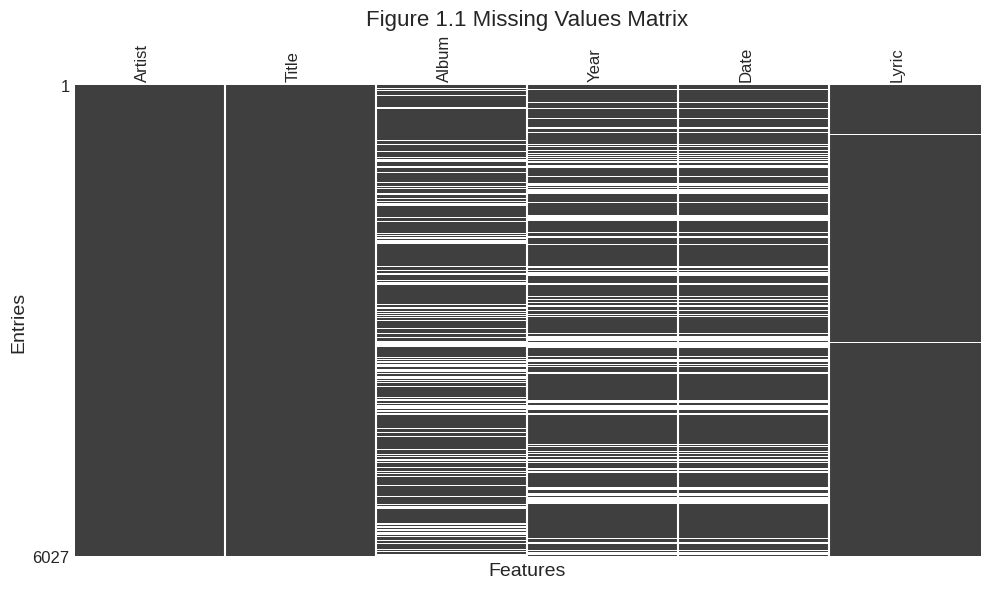

In [ ]:
plt.figure(figsize=(10, 8))
msno.matrix(df_cleaned, figsize=(10, 6), fontsize=12, sparkline=False, labels=True)

plt.title('Figure 1.1 Missing Values Matrix', fontsize=16)
plt.xticks(rotation=90, ha='right')
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Entries', fontsize=14)
plt.tight_layout()
plt.show()

#Coded by Madhumitha

Inorder to understand of the null values are at random or were they missing with a certain pattern, we plotted the frequency matrix of the null values in the data frame. From the Figure 1.1 we can note that the null values are at random.

In [ ]:
unique_artist =df_cleaned['Artist'].unique()
unique_artist

num_unique = len(unique_artist)
print("Number of Unique Artists:",num_unique)

#Coded by Madhumitha

Number of Unique Artists: 21


The unique artist names are being extracted by the code from the DataFrame df_cleaned's 'Artist' column.

In [ ]:
df_null = df_cleaned[['Artist','Album','Year', 'Date', 'Lyric']]

tot_artist = df_cleaned['Artist'].value_counts()
null_year_percentage = (df_null[df_null['Year'].isna()].groupby('Artist').size() * 100 / tot_artist).rename('Artist_Year%')
null_date_percentage = (df_null[df_null['Date'].isna()].groupby('Artist').size() * 100 / tot_artist).rename('Artist_Date%')
null_album_percentage = (df_null[df_null['Album'].isna()].groupby('Artist').size() * 100 / tot_artist).rename('Artist_Album%')
null_lyric_percentage = (df_null[df_null['Lyric'].isna()].groupby('Artist').size() * 100 / tot_artist).rename('Artist_Lyric%')

df_null = pd.concat([null_year_percentage, null_date_percentage, null_album_percentage, null_lyric_percentage], axis=1)
df_null.reset_index(inplace=True)
df_null

#Coded by Himani

,index,Artist_Year%,Artist_Date%,Artist_Album%,Artist_Lyric%
0,Ariana Grande,NaN,NaN,30.194805,NaN
1,BTS (방탄소년단),1.798561,1.798561,7.913669,2.877698
2,Beyoncé,33.251232,33.251232,23.645320,NaN
3,Billie Eilish,17.931034,17.931034,43.448276,NaN
4,Cardi B,22.666667,22.666667,41.333333,NaN
5,Charlie Puth,22.666667,22.666667,36.000000,NaN
6,Coldplay,29.651163,29.651163,23.255814,3.197674
7,Drake,29.184549,29.184549,32.618026,0.429185
8,Dua Lipa,27.935223,27.935223,35.222672,0.404858
9,Ed Sheeran,35.135135,35.135135,40.202703,0.675676


The above table represents the corresponding percentage values of **Year**, **Date** and **Lyrics** with respect to each Artist.

##1.2 Null Values by Lyrics for Artist

<ipython-input-228-41c3daaaa807>:11: UserWarning:

Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.

<ipython-input-228-41c3daaaa807>:11: UserWarning:

Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.

<ipython-input-228-41c3daaaa807>:11: UserWarning:

Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.

<ipython-input-228-41c3daaaa807>:11: UserWarning:

Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.

<ipython-input-228-41c3daaaa807>:11: UserWarning:

Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49548 (\N{HANGUL

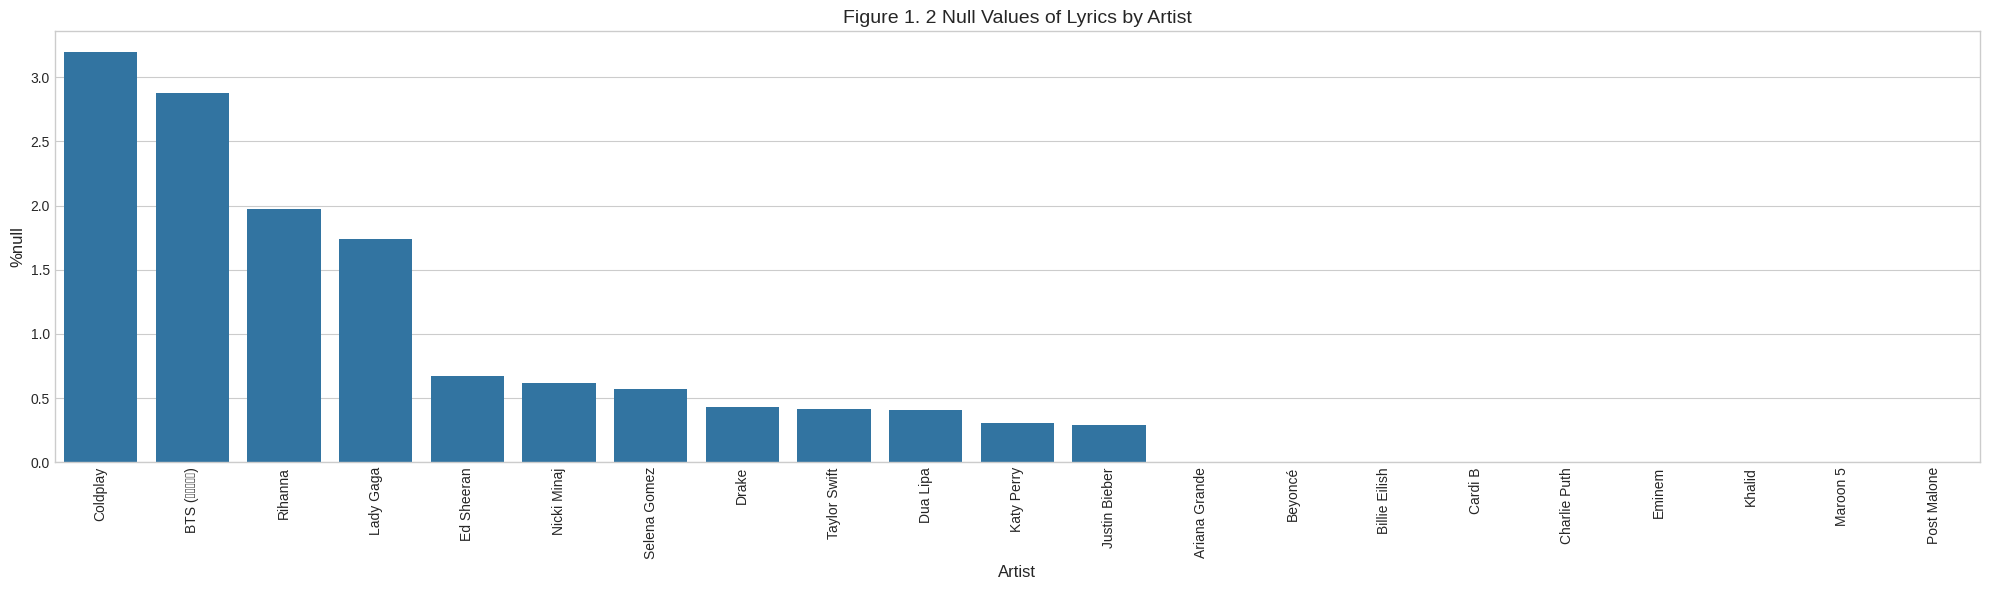

In [ ]:
plt.figure(figsize=(20, 6))

df_null_sort=df_null.sort_values(by='Artist_Lyric%', ascending = False).reset_index()

sns.barplot(x='index', y='Artist_Lyric%', data=df_null_sort)

plt.xlabel('Artist', fontsize=12)
plt.ylabel('%null', fontsize=12)
plt.title('Figure 1. 2 Null Values of Lyrics by Artist', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Coded by Himani

The above Figure 1.2 represents the plot of null values in Lyrics for each artist. We see that Cold Play, followed by BTS and Rihana do not have close to just 3% of the total values.

##1.3 Null Values of Year and Album for Artist

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.



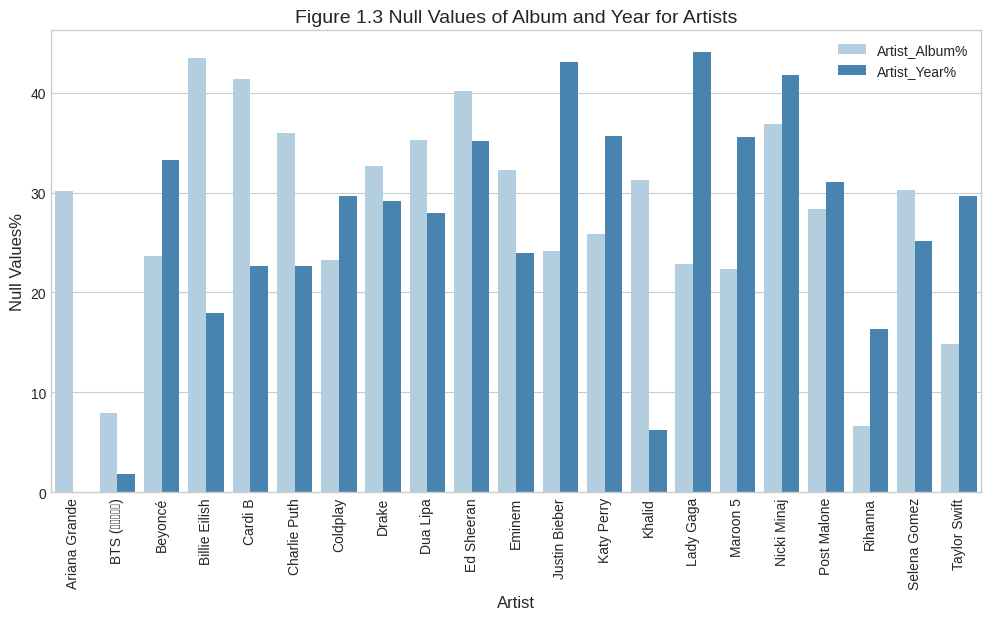

In [ ]:
pivot_table = pd.pivot_table(df_null, index='index', values=['Artist_Year%', 'Artist_Album%'])
pivot_table.reset_index(inplace=True)
df_melt = pivot_table.melt(id_vars='index', var_name='Value', value_name='Null Percentage')

plt.figure(figsize=(12, 6))
sns.barplot(x='index', y='Null Percentage', hue='Value', data=df_melt, palette='Blues')

plt.xlabel('Artist', fontsize=12)
plt.ylabel('Null Values%', fontsize=12)
plt.title('Figure 1.3 Null Values of Album and Year for Artists', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title=None)
plt.show()

#Coded by Madhumitha


Figure 1.3 is an extensive plot of the null values present in each **Year** and **Album** for each artist. We can observe that Lady Gaga and Justin Bieber have considerably high values of null values in **Year**.

While Beyonce and Cardi B have highest null values in **Album**

In [ ]:
df_melt
#Coded by Madhumitha

,index,Value,Null Percentage
0,Ariana Grande,Artist_Album%,30.194805
1,BTS (방탄소년단),Artist_Album%,7.913669
2,Beyoncé,Artist_Album%,23.645320
3,Billie Eilish,Artist_Album%,43.448276
4,Cardi B,Artist_Album%,41.333333
5,Charlie Puth,Artist_Album%,36.000000
6,Coldplay,Artist_Album%,23.255814
7,Drake,Artist_Album%,32.618026
8,Dua Lipa,Artist_Album%,35.222672
9,Ed Sheeran,Artist_Album%,40.202703


Since there a lot of null values in Album, Year and Date it is better to drop these columns.

Since rows with null lyrics are less than 4%, can drop these rows

In [ ]:
df_cleaned=df_cleaned.drop(columns=['Album','Year','Date'], axis=1)
df_cleaned=df_cleaned.dropna()

cleaned_summary = {
    'Initial Rows': df.shape[0],
    'Final Rows': df_cleaned.shape[0],
    'Rows Removed': df.shape[0] - df_cleaned.shape[0]
}

print(cleaned_summary)

#Coded by Madhumitha

{'Initial Rows': 6027, 'Final Rows': 5981, 'Rows Removed': 46}


In [ ]:
duplicate_rows = df_cleaned[df_cleaned.duplicated()]
print("Duplicate rows:")
duplicate_rows

#Coded by Himani

Duplicate rows:


,Artist,Title,Lyric


From this we see that we dont have any duplicate rows which need to processed.

#2. Exploratory Data Analysis

In [ ]:
df_punkt=df_cleaned.copy()
df_punkt['punctuation_count'] = df_punkt['Lyric'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))
df_punkt

#Coded by Shailoz

,Artist,Title,Lyric,punctuation_count
0,Dua Lipa,New Rules,one one one one one talkin' in my sleep at n...,84
1,Dua Lipa,Don’t Start Now,if you don't wanna see me did a full 80 craz...,42
2,Dua Lipa,IDGAF,you call me all friendly tellin' me how much y...,53
3,Dua Lipa,Blow Your Mind (Mwah),i know it's hot i know we've got something tha...,48
4,Dua Lipa,Be the One,i see the moon i see the moon i see the moon o...,21
...,...,...,...,...
6022,Post Malone,Lithium,i'm so happy 'cause today i found my friends t...,47
6023,Post Malone,Something in the Way,verse underneath the tarp has sprung a leak a...,10
6024,Post Malone,In Bloom,sell the kids for food weather changes moods s...,6
6025,Post Malone,Territorial Pissings,when i was an alien cultures weren't opinions ...,18


We are deriving the punctuations used by each artist in each song to understand. This could serve as a starting point to understanding the rhythm and song structure.

##2.1 Length of lyrics

In [ ]:
df_cleaned['Lyrics_len']=df_cleaned['Lyric'].apply(lambda x: len(str(x).split()))

#Coded by Madhumitha

In [ ]:
df_len=df_cleaned.copy()
df_len= df_len.groupby('Artist')['Lyrics_len'].mean().reset_index()
df_len['Lyrics_len'] = df_len['Lyrics_len'].round(0)
df_len.head(5)

#Coded by Madhumitha

,Artist,Lyrics_len
0,Ariana Grande,322.0
1,BTS (방탄소년단),504.0
2,Beyoncé,411.0
3,Billie Eilish,200.0
4,Cardi B,425.0


In [ ]:
df_len
#Coded by Madhumitha

,Artist,Lyrics_len
0,Ariana Grande,322.0
1,BTS (방탄소년단),504.0
2,Beyoncé,411.0
3,Billie Eilish,200.0
4,Cardi B,425.0
5,Charlie Puth,317.0
6,Coldplay,189.0
7,Drake,470.0
8,Dua Lipa,311.0
9,Ed Sheeran,378.0


<ipython-input-237-f31a86615720>:13: UserWarning:

Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.

<ipython-input-237-f31a86615720>:13: UserWarning:

Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.

<ipython-input-237-f31a86615720>:13: UserWarning:

Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.

<ipython-input-237-f31a86615720>:13: UserWarning:

Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.

<ipython-input-237-f31a86615720>:13: UserWarning:

Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49548 (\N{HANGUL

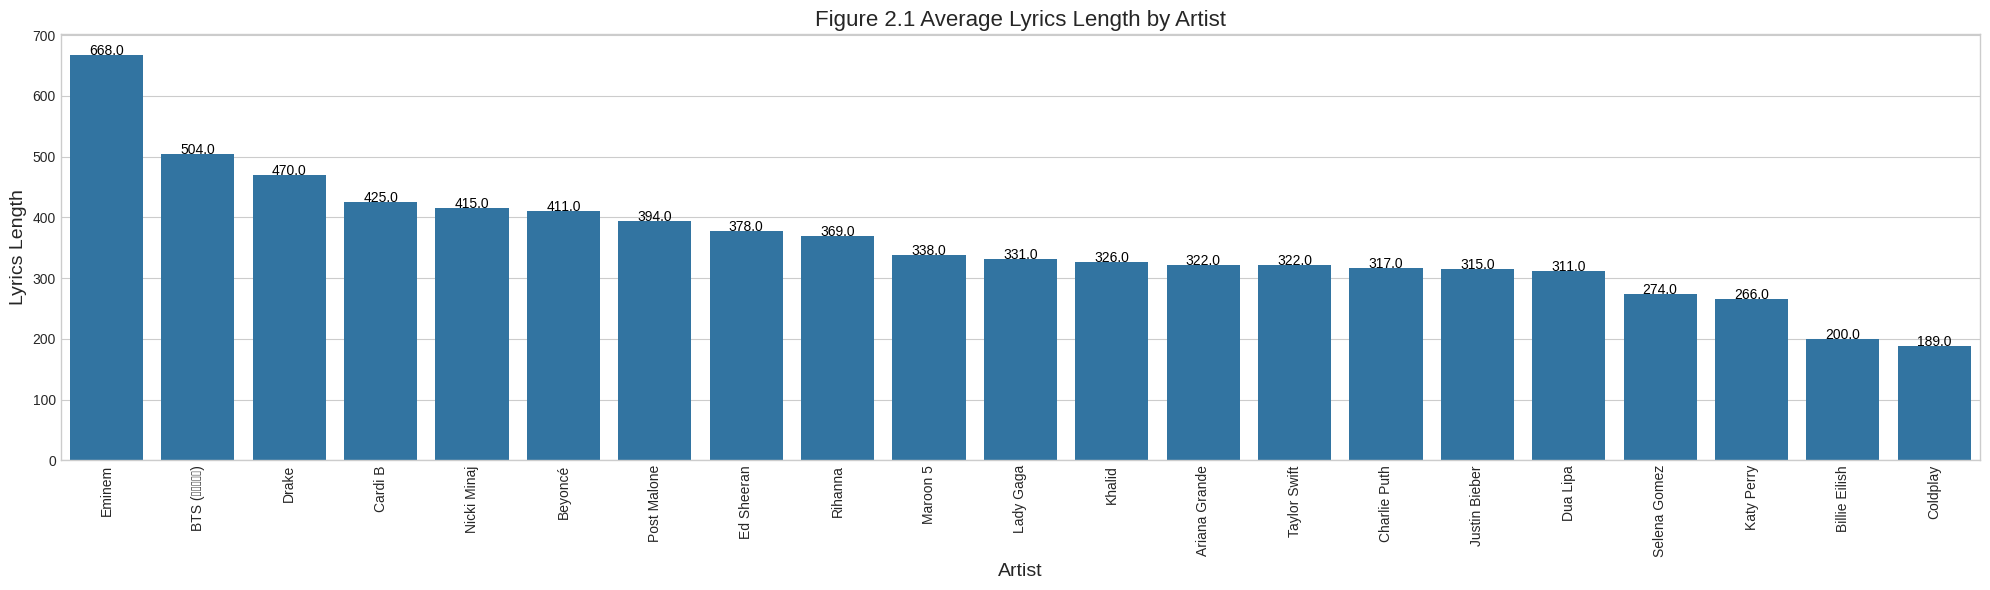

In [ ]:
df_len=df_len.sort_values(by='Lyrics_len', ascending=False).reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='Artist', y='Lyrics_len', data=df_len)

for index, row in df_len.iterrows():
    plt.text(index, row['Lyrics_len'], row['Lyrics_len'], color='black', ha="center")

plt.xlabel('Artist', fontsize=14)
plt.ylabel('Lyrics Length', fontsize=14)
plt.title('Figure 2.1 Average Lyrics Length by Artist', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Coded by Madhumitha


Figure 2.1 is a plot of average lyrics length for each artist. It is interesting to note that Eminem tops having a distinct difference with the next artist, BTS. This disparity may be attributed to Eminem's style as a rapper, where lyrics tend to contain a higher number of words despite maintaining a typical song length.

[Eminem Vocabulary](https://www.detroitnews.com/story/entertainment/music/2015/07/23/study-eminem-largest-vocabulary-music/30574233/) The link also cross verifies how Eminem has the highest number of vocabulary

##2.2 Unique Words Percentage by each Artist

In [ ]:
unqiue_words_artist = {}
tot_words_artist={}
df_grp = df_cleaned.groupby('Artist')

for artist, df_grp in df_grp:
    lyrics_all = ' '.join(df_grp['Lyric'].astype(str))
    words = lyrics_all.lower().split()
    tot_words = len(words)
    tot_words_artist[artist] = tot_words
    unique_words = set(words)
    unqiue_words_artist[artist] = unique_words

    #Coded by Shailoz

In [ ]:
df_unique_words = {
    'Artist': [artist for artist in unqiue_words_artist.keys()],
    'Unique_Words': [len(unique_words) for unique_words in unqiue_words_artist.values()],
    'Total_Words': [tot_words_artist[artist] for artist in tot_words_artist.keys()]
}
df_unique_words = pd.DataFrame(df_unique_words)
df_unique_words

#Coded by Shailoz

,Artist,Unique_Words,Total_Words
0,Ariana Grande,4306,99120
1,BTS (방탄소년단),21158,136138
2,Beyoncé,6647,166744
3,Billie Eilish,1915,28951
4,Cardi B,3319,31855
5,Charlie Puth,1643,23761
6,Coldplay,3520,62871
7,Drake,11679,218011
8,Dua Lipa,2792,76611
9,Ed Sheeran,5765,111086


In [ ]:
df_unique_words['Percentage_words']=df_unique_words['Unique_Words']*100/df_unique_words['Total_Words']
df_unique_words['Percentage_words']=df_unique_words['Percentage_words'].round(2)

#Coded by Shailoz

<ipython-input-241-e1f4895d2c5a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-241-e1f4895d2c5a>:12: UserWarning:

Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.

<ipython-input-241-e1f4895d2c5a>:12: UserWarning:

Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.

<ipython-input-241-e1f4895d2c5a>:12: UserWarning:

Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.

<ipython-input-241-e1f4895d2c5a>:12: UserWarning:

Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.

<ipython-input-241-e1f4895d2c5a>:12: UserWarning:

Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages

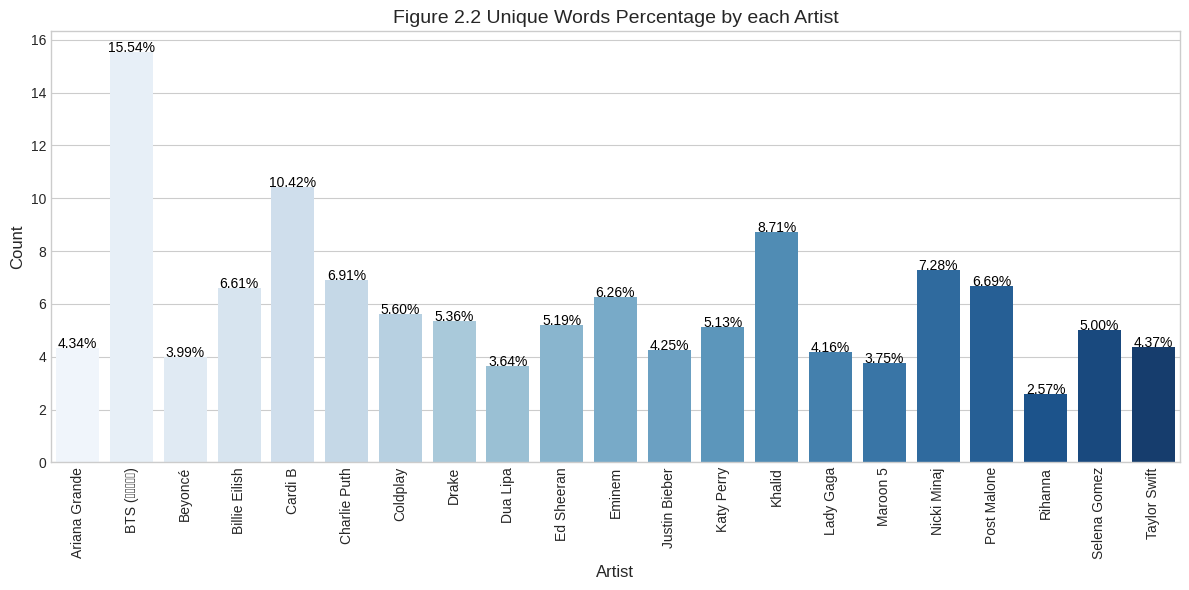

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Artist', y='Percentage_words', data=df_unique_words, palette='Blues')

for index, row in df_unique_words.iterrows():
    plt.text(index, row['Percentage_words'], f"{row['Percentage_words']:.2f}%", color='black', ha='center')

plt.xlabel('Artist', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Figure 2.2 Unique Words Percentage by each Artist', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title=None)
plt.tight_layout()
plt.show()

#Coded by Shailoz

As we proceed with the text analysis, it is interesting to note how different artist have a very unique style. Major part of the word usage can be captured from Figure 2.2 which gives a complete picture on what percent of the entire lyrics are actually unique words.
BTS tops with 15% unqiue words with Rihana being the least. This makes sense, as sometimes the songs has a major chunk covered with music and chorus.
[Chorus importance](https://www.secretsofsongwriting.com/2016/04/18/why-a-good-chorus-usually-surpasses-a-good-verse-in-importance/)This link talks extensively about how chorus surpasses a verses in importance. This also attributes why most of the artist have very few unqiue words and focus on music and chorus.

##2.3 Word Tokenization

In [ ]:
!pip install nltk
#Coded by Prudhvi

In [ ]:
nltk.download('punkt')
#Coded by Prudhvi

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df_cleaned['Lyric'] = df_cleaned['Lyric'].astype(str)
df_cleaned['Tokenized_Lyric'] = df_cleaned['Lyric'].apply(lambda x: word_tokenize(x))
df_cleaned[['Lyric', 'Tokenized_Lyric']]

#Coded by Prudhvi

,Lyric,Tokenized_Lyric
0,one one one one one talkin' in my sleep at n...,"[one, one, one, one, one, talkin, ', in, my, s..."
1,if you don't wanna see me did a full 80 craz...,"[if, you, do, n't, wan, na, see, me, did, a, f..."
2,you call me all friendly tellin' me how much y...,"[you, call, me, all, friendly, tellin, ', me, ..."
3,i know it's hot i know we've got something tha...,"[i, know, it, 's, hot, i, know, we, 've, got, ..."
4,i see the moon i see the moon i see the moon o...,"[i, see, the, moon, i, see, the, moon, i, see,..."
...,...,...
6022,i'm so happy 'cause today i found my friends t...,"[i, 'm, so, happy, 'cause, today, i, found, my..."
6023,verse underneath the tarp has sprung a leak a...,"[verse, underneath, the, tarp, has, sprung, a,..."
6024,sell the kids for food weather changes moods s...,"[sell, the, kids, for, food, weather, changes,..."
6025,when i was an alien cultures weren't opinions ...,"[when, i, was, an, alien, cultures, were, n't,..."


In [ ]:
df_cleaned['Tokenized_Lyric_String'] = df_cleaned['Tokenized_Lyric'].apply(lambda x: ' '.join(x))
vectorizer = CountVectorizer()
#Coded by Prudhvi

In [ ]:
X = vectorizer.fit_transform(df_cleaned['Tokenized_Lyric_String'])
df_vectorizer = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
#Coded by Prudhvi

In [ ]:
df_vectorizer.head(3)
#Coded by Prudhvi

,00,000,0000,00000,0000000,000s,000the,004,004mosh,005,...,힙찌질이,힙찌질일,힙찔,힙합,힙합계의,힙합성애자,힙합으로,힙합은,힙합이,힛잇을
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


All the above processing aims to tokenize and vectorize the words present in the lyrcis of the data set. We see that we have more than 55k columns which are generated.

###2.3.1 Stop Words

In [ ]:
df_cleaned['Tokenized_Lyric'] = df_cleaned['Lyric'].apply(lambda x: x.lower().split())

stop_words = set(ENGLISH_STOP_WORDS)
df_cleaned['Tokenized_Lyric'] = df_cleaned['Tokenized_Lyric'].apply(lambda x: [word for word in x if word not in stop_words])

#Coded by Himani

In [ ]:
df_cleaned['Tokenized_Lyric_String'] = df_cleaned['Tokenized_Lyric'].apply(lambda x: ' '.join(x))
vectorizer_stop = CountVectorizer(stop_words='english')

X = vectorizer_stop.fit_transform(df_cleaned['Tokenized_Lyric_String'])
vectorized_df_cleaned = pd.DataFrame(X.toarray(), columns=vectorizer_stop.get_feature_names_out())

#Coded by Himani

In [ ]:
print("The number of stop words removed:", (df_vectorizer.shape[1]-vectorized_df_cleaned.shape[1]))

#Coded by Himani

The number of stop words removed: 282


Though we have 55K words, we also are aware that there could be stop words. So we set to remove the stop words to enhance our text processing better. We see that we have close to 300 stop words present in the data set which were removed.

##2.4 Sentence Tokenization

In [ ]:
df_cleaned['Tokenized_Sent_Lyric'] = df_cleaned['Lyric'].apply(lambda x: sent_tokenize(x))
df_cleaned
#Coded by Prudhvi

,Artist,Title,Lyric,Lyrics_len,Tokenized_Lyric,Tokenized_Lyric_String,Tokenized_Sent_Lyric
0,Dua Lipa,New Rules,one one one one one talkin' in my sleep at n...,486,"[talkin', sleep, night, makin', crazy, mind, m...",talkin' sleep night makin' crazy mind mind wro...,[one one one one one talkin' in my sleep at ...
1,Dua Lipa,Don’t Start Now,if you don't wanna see me did a full 80 craz...,307,"[don't, wanna, did, 80, crazy, thinking, 'bout...",don't wanna did 80 crazy thinking 'bout way di...,[if you don't wanna see me did a full 80 cra...
2,Dua Lipa,IDGAF,you call me all friendly tellin' me how much y...,445,"[friendly, tellin', miss, that's, funny, guess...",friendly tellin' miss that's funny guess you'v...,[you call me all friendly tellin' me how much ...
3,Dua Lipa,Blow Your Mind (Mwah),i know it's hot i know we've got something tha...,429,"[know, it's, hot, know, we've, got, money, can...",know it's hot know we've got money can't buy f...,[i know it's hot i know we've got something th...
4,Dua Lipa,Be the One,i see the moon i see the moon i see the moon o...,406,"[moon, moon, moon, oh, you're, looking, sun, i...",moon moon moon oh you're looking sun i'm fool ...,[i see the moon i see the moon i see the moon ...
...,...,...,...,...,...,...,...
6022,Post Malone,Lithium,i'm so happy 'cause today i found my friends t...,296,"[i'm, happy, 'cause, today, friends, they're, ...",i'm happy 'cause today friends they're head i'...,[i'm so happy 'cause today i found my friends ...
6023,Post Malone,Something in the Way,verse underneath the tarp has sprung a leak a...,159,"[verse, underneath, tarp, sprung, leak, animal...",verse underneath tarp sprung leak animals i've...,[verse underneath the tarp has sprung a leak ...
6024,Post Malone,In Bloom,sell the kids for food weather changes moods s...,266,"[sell, kids, food, weather, changes, moods, sp...",sell kids food weather changes moods spring re...,[sell the kids for food weather changes moods ...
6025,Post Malone,Territorial Pissings,when i was an alien cultures weren't opinions ...,165,"[alien, cultures, weren't, opinions, gotta, wa...",alien cultures weren't opinions gotta way way ...,[when i was an alien cultures weren't opinions...


In [ ]:
df_cleaned['Num_Sentences'] = df_cleaned['Tokenized_Sent_Lyric'].apply(len)
art_sent_cnt = df_cleaned.groupby('Artist')['Num_Sentences'].sum().reset_index()

art_sent_cnt
#Coded by Prudhvi

,Artist,Num_Sentences
0,Ariana Grande,308
1,BTS (방탄소년단),270
2,Beyoncé,406
3,Billie Eilish,145
4,Cardi B,75
5,Charlie Puth,75
6,Coldplay,333
7,Drake,464
8,Dua Lipa,246
9,Ed Sheeran,294


In [ ]:
art_word_cnt = df_cleaned.groupby('Artist')['Lyrics_len'].sum().reset_index()
art_sent_word_cnt = pd.merge(art_sent_cnt, art_word_cnt, on='Artist')
art_sent_word_cnt['Avg_Words_Per_Sentence'] = art_sent_word_cnt['Lyrics_len'] / art_sent_word_cnt['Num_Sentences']
#Coded by Prudhvi

<ipython-input-254-f6e36db38661>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.



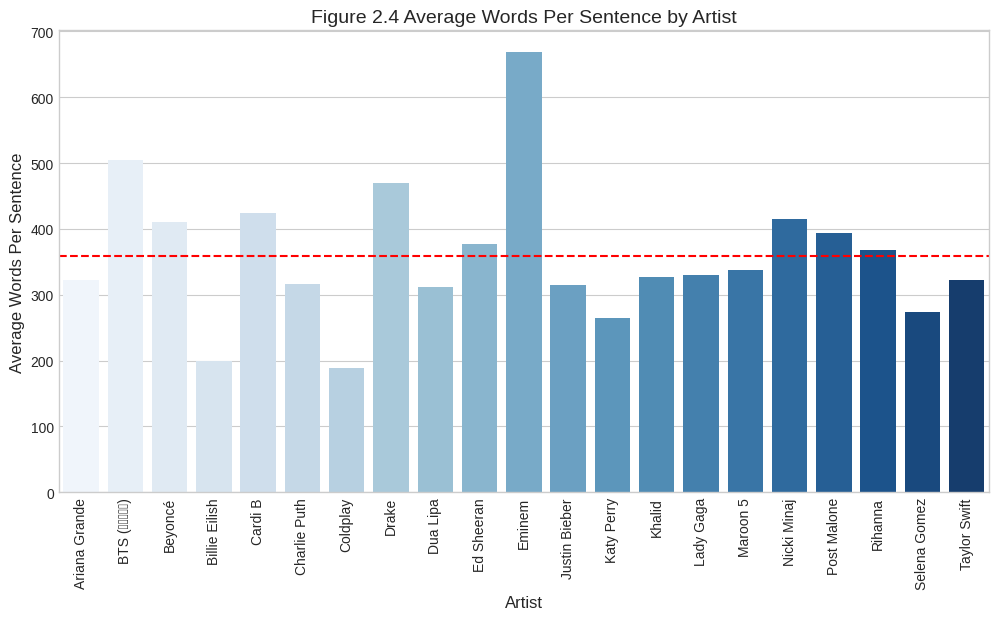

In [ ]:
avg_all = art_sent_word_cnt['Avg_Words_Per_Sentence'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x='Artist', y='Avg_Words_Per_Sentence', data=art_sent_word_cnt, palette='Blues', label='Artist')
plt.axhline(avg_all, color='red', linestyle='--', label='Overall Average')
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Average Words Per Sentence', fontsize=12)
plt.title('Figure 2.4 Average Words Per Sentence by Artist', fontsize=14)
plt.xticks(rotation=90)
plt.show()
#Coded by Prudhvi

Further going from Word Tokenization to Sentence Tokenization, we derived the average number of lyrics per sentence for each artist. Figure 2.4, it is almost an even distribution between the artist where half of them have above average and rest below average.

##2.5 Most Popular Words by Artist

In [ ]:
vectorized_df_cleaned['Artist'] = df_cleaned['Artist']

artist_word_counts = vectorized_df_cleaned.groupby('Artist').sum()

most_popular_words_by_artist = {}
for artist, word_counts in artist_word_counts.iterrows():
    most_popular_words = word_counts.sort_values(ascending=False).index[:5]
    most_popular_words_by_artist[artist] = most_popular_words.tolist()

most_popular_words_by_artist
#Coded by Prudhvi

{'Ariana Grande': ['baby', 'love', 'yeah', 'know', 'got'],
 'BTS (방탄소년단)': ['jungkook', 'oh', 'yeah', 'la', 'jimin'],
 'Beyoncé': ['oh', 'love', 'like', 'let', 'baby'],
 'Billie Eilish': ['don', 'like', 'know', 'yeah', 'love'],
 'Cardi B': ['yeah', 'know', 'like', 'don', 'ooh'],
 'Charlie Puth': ['like', 'don', 'bitch', 'yeah', 'just'],
 'Coldplay': ['oh', 'love', 'don', 'just', 'know'],
 'Drake': ['like', 'know', 'just', 'yeah', 'got'],
 'Dua Lipa': ['don', 'know', 'got', 'love', 'let'],
 'Ed Sheeran': ['love', 'need', 'like', 'know', 'don'],
 'Eminem': ['like', 'just', 'don', 'cause', 'got'],
 'Justin Bieber': ['oh', 'yeah', 'love', 'girl', 'don'],
 'Katy Perry': ['like', 'don', 'oh', 'yeah', 'just'],
 'Khalid': ['don', 'like', 'yeah', 'know', 'just'],
 'Lady Gaga': ['want', 'love', 'baby', 'oh', 'don'],
 'Maroon 5': ['yeah', 'don', 'know', 'like', 'oh'],
 'Nicki Minaj': ['like', 'know', 'nicki', 'got', 'don'],
 'Post Malone': ['yeah', 'don', 'know', 'like', 'got'],
 'Rihanna': ['lik

In [ ]:
df_output = pd.DataFrame.from_dict(most_popular_words_by_artist, orient='index', columns=['Word 1', 'Word 2', 'Word 3', 'Word 4', 'Word 5'])
print(df_output)
#Coded by Prudhvi

                 Word 1 Word 2 Word 3 Word 4 Word 5
Ariana Grande      baby   love   yeah   know    got
BTS (방탄소년단)    jungkook     oh   yeah     la  jimin
Beyoncé              oh   love   like    let   baby
Billie Eilish       don   like   know   yeah   love
Cardi B            yeah   know   like    don    ooh
Charlie Puth       like    don  bitch   yeah   just
Coldplay             oh   love    don   just   know
Drake              like   know   just   yeah    got
Dua Lipa            don   know    got   love    let
Ed Sheeran         love   need   like   know    don
Eminem             like   just    don  cause    got
Justin Bieber        oh   yeah   love   girl    don
Katy Perry         like    don     oh   yeah   just
Khalid              don   like   yeah   know   just
Lady Gaga          want   love   baby     oh    don
Maroon 5           yeah    don   know   like     oh
Nicki Minaj        like   know  nicki    got    don
Post Malone        yeah    don   know   like    got
Rihanna     

Being hard core fans of these artists, we could totally relate to how these were the most popular words used by the artists.
This table aims to get insight into the most popular words by each artist. It is interesting to note that the words are almost similar to all the artist.

In [ ]:
vectorized_df_cleaned['Artist'] = df_cleaned['Artist']

artist_word_counts = vectorized_df_cleaned.groupby('Artist').sum()

most_popular_words_by_artist_100 = {}
for artist, word_counts in artist_word_counts.iterrows():
    most_popular_words = word_counts.sort_values(ascending=False).index[:100]
    most_popular_words_by_artist_100[artist] = most_popular_words.tolist()

most_popular_words_by_artist_100

df_output_100 = pd.DataFrame.from_dict(most_popular_words_by_artist_100, orient='index')
df_output_100
#Coded by Prudhvi

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Ariana Grande,baby,love,yeah,know,got,don,oh,just,like,cause,...,charlie,da,puth,feeling,body,long,mmm,world,life,free
BTS (방탄소년단),jungkook,oh,yeah,la,jimin,love,know,let,like,rm,...,feel,heart,bts,monster,world,가사,today,fly,ma,hook
Beyoncé,oh,love,like,let,baby,don,know,got,beyoncé,cause,...,ring,thing,feelin,party,bout,best,day,gettin,hook,stay
Billie Eilish,don,like,know,yeah,love,eyes,ocean,say,ve,make,...,told,feet,leave,thought,makes,wonder,hmm,care,bury,aren
Cardi B,yeah,know,like,don,ooh,just,got,oh,want,ain,...,ohohohoh,waitin,gave,drop,niggas,ball,check,pull,wrist,told
Charlie Puth,like,don,bitch,yeah,just,got,cardi,money,know,oh,...,heart,house,good,long,tryna,best,face,boy,weave,goin
Coldplay,oh,love,don,just,know,ll,yeah,like,come,want,...,boom,ohoh,remember,break,rain,stars,gone,beautiful,hook,wants
Drake,like,know,just,yeah,got,don,drake,shit,love,girl,...,bad,gone,goin,drop,sure,hope,game,ready,dont,run
Dua Lipa,don,know,got,love,let,like,cause,come,baby,yeah,...,body,home,learn,dollar,real,crazy,eyes,late,turn,stay
Ed Sheeran,love,need,like,know,don,just,ll,oh,come,man,...,stop,face,dance,ye,em,ya,words,low,left,try


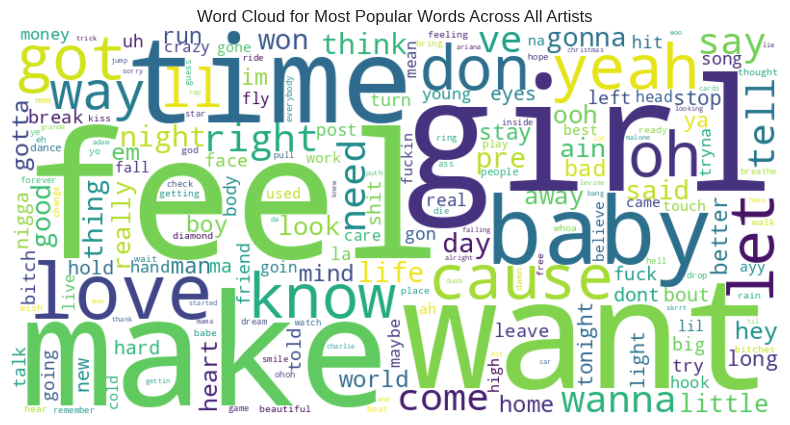

In [ ]:
all_words = ' '.join([' '.join(words) for words in most_popular_words_by_artist_100.values()])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Most Popular Words Across All Artists')
plt.show()

#Coded by Shailoz

Replicating the same to get a word cloud on the top 100 words used by all the artist. We can see the words like girl, want, know, feel are used by most of the artist almost all the time.

##2.6 Dimensionality Reduction

In [ ]:
pca = PCA(n_components=160)
df_vect_pca=pca.fit_transform(df_vectorizer)

df_components = pd.DataFrame(df_vect_pca)

#Coded by Prudhvi

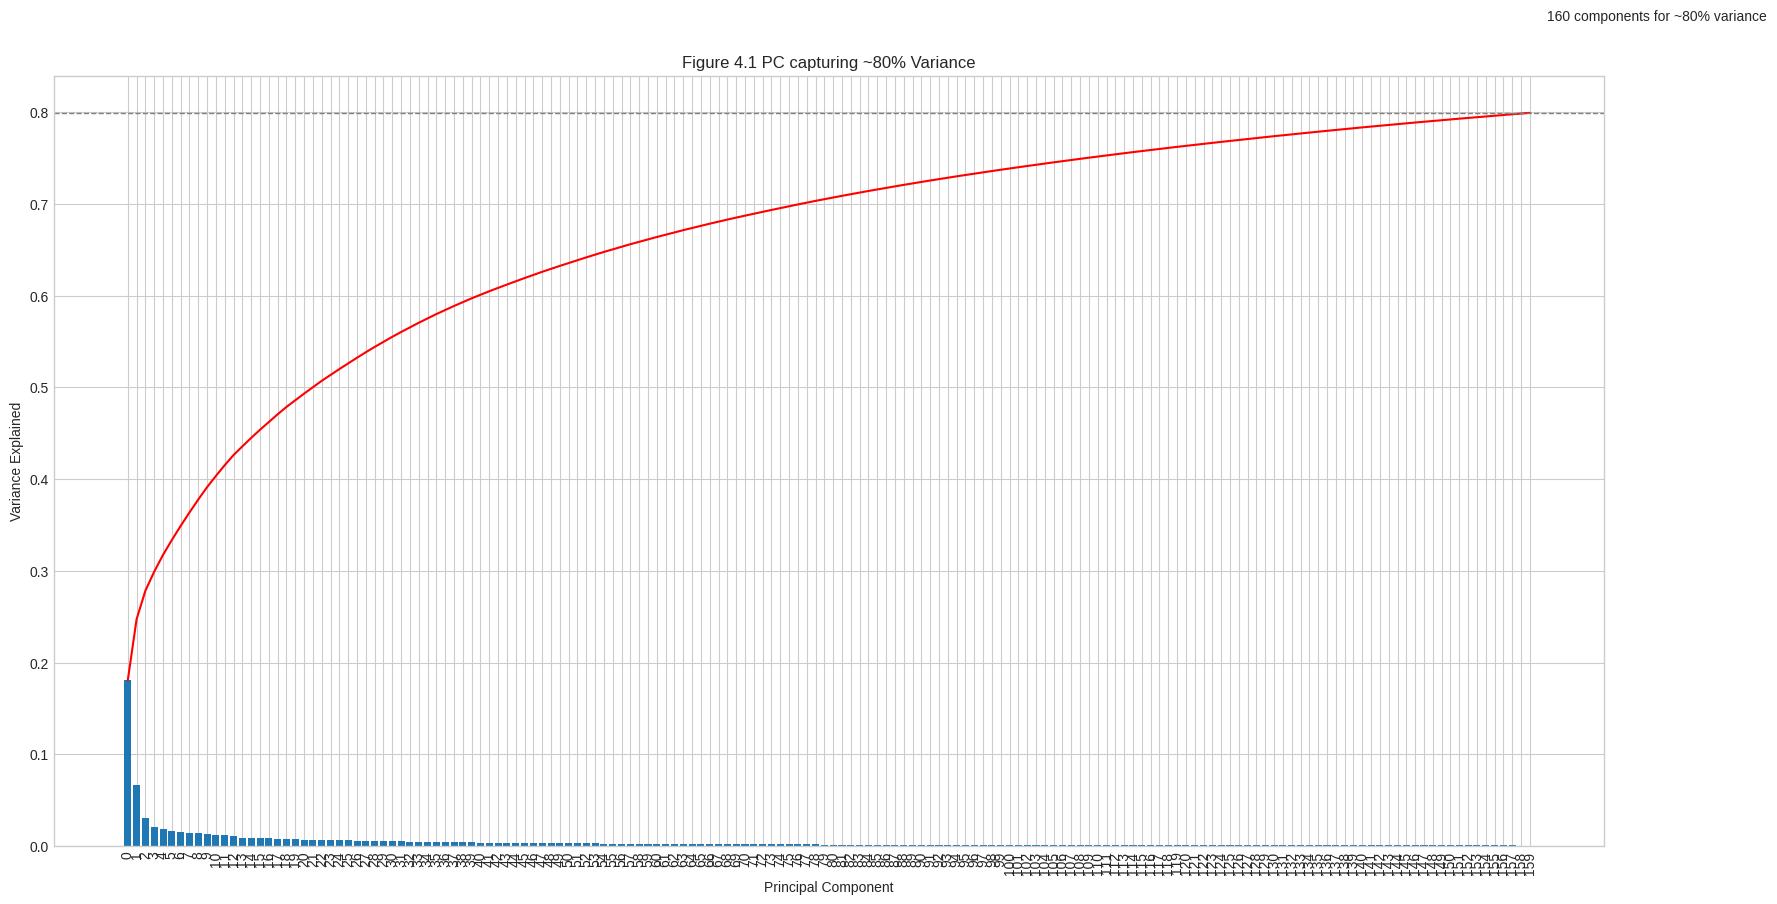

In [ ]:
component_ids = range(pca.n_components_)
cum_var = np.cumsum(pca.explained_variance_ratio_)
required_components = np.argmax(cum_var >= 0.799)+1

plt.figure(figsize=(20,10))
plt.bar(component_ids, pca.explained_variance_ratio_)
plt.plot(component_ids, cum_var, color='red')
plt.axhline(y=0.799, color='gray', linestyle='--', linewidth=1)
plt.xticks(component_ids, rotation=90)
plt.ylabel('Variance Explained')
plt.xlabel('Principal Component')
plt.title('Figure 4.1 PC capturing ~80% Variance')
plt.annotate(f'{required_components} components for ~80% variance', xy=(required_components, 0.799), xytext=(required_components+1, 0.9))
plt.show()

#Coded by Prudhvi


After tokenization, we decided to do dimensionality reduction to capture at least 80% of the variance. This was done to further the cluster data and derive insights.
It is not surprising to almost 80% of the variance in contained in just 160 components which is less than 1% (0.29%) of the features.

##2.7 Clustering

In [ ]:
kmeans_res=KMeans(3,init='random').fit(df_components)
#Coded by Madhumitha

In [ ]:
df_components['labels']=kmeans_res.labels_
df_components['labels'].value_counts()
#Coded by Madhumitha

1    4025
0    1944
2      12
Name: labels, dtype: int64

SENTIMENT ANALYSIS

Using PCA we do clustering with 3 clusters using KMeans. Further we would build upon this to analyse sentiments, emotions, etc.

# Preliminary Results

1. **Tokenization and Stop Words Removal:** Commencing the analysis, we strategically tokenized both words and sentences within the lyrics, laying the groundwork for a more granular examination of the textual content. To enhance the quality of our analysis, stop words were judiciously eliminated using the 'nltk' library and the 'ENGLISH_STOP_WORDS' set in Python.

2. **Most Commonly Used Words Analysis**: We **embarked on deciphering the linguistic landscape by identifying the most commonly used words in the lyrics across various artists. Employing the insights gained from tokenization, we generated a visually informative word cloud, offering a snapshot of the prevalent words that characterize the lyrical expressions of each artist.

3. **Dimensionality Reduction with PCA:** A significant challenge surfaced during the vectorization process, resulting in an overwhelming 57,000+ features (words). In response, we applied Principal Component Analysis (PCA) to effectively reduce dimensionality while retaining key information. Remarkably, the application of PCA allowed us to condense the feature space to 160 components, capturing an impressive 80% of the variance within the dataset.

4. **Clustering Analysis**: Building upon the reduced feature set derived from PCA, we proceeded to deploy clustering techniques. Opting for a cluster count of 3, we sought to unveil inherent patterns and groupings within the lyrical content. This clustering analysis lays the foundation for categorizing artists based on similarities in their linguistic choices, paving the way for more nuanced insights into the dataset.

## **Interim Observations:**
The preliminary results showcase a successful initial exploration into the intricate linguistic patterns within the lyrics dataset. By addressing challenges related to dimensionality, tokenization, and stop words, we have set the stage for a more focused and insightful analysis. The combination of word cloud visualizations, dimensionality reduction with PCA, and clustering adds depth to our understanding of artists' linguistic inclinations, setting the groundwork for further exploration and interpretation in subsequent stages of the unsupervised machine learning project.



#3. Sentiment Analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')

#Coded by Prudhvi

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sid = SentimentIntensityAnalyzer()

def calculate_sentiment_vader(text):
    sentiment = sid.polarity_scores(text)
    return sentiment

#Coded by Prudhvi

We are using a python Package called Sentiment Intensity Analyser to derive sentiment scores for the songs

In [ ]:
senti_score = df_cleaned['Lyric'].apply(calculate_sentiment_vader)

#Coded by Prudhvi

In [ ]:
df_senti = pd.DataFrame(senti_score.tolist(), index=df_cleaned.index)

df_senti['Artist'] = df_cleaned['Artist']
df_senti

#Coded by Prudhvi

,neg,neu,pos,compound,Artist
0,0.089,0.828,0.083,0.2663,Dua Lipa
1,0.134,0.832,0.033,-0.9870,Dua Lipa
2,0.119,0.696,0.185,0.9909,Dua Lipa
3,0.108,0.607,0.285,0.9988,Dua Lipa
4,0.062,0.881,0.057,-0.8813,Dua Lipa
...,...,...,...,...,...
6022,0.100,0.455,0.444,0.9990,Post Malone
6023,0.066,0.824,0.110,0.5574,Post Malone
6024,0.115,0.620,0.264,0.9950,Post Malone
6025,0.028,0.743,0.229,0.9841,Post Malone


In [ ]:
mean_score = df_senti.groupby('Artist').mean()
mean_score

#Coded by Prudhvi

,neg,neu,pos,compound
Artist,,,,
Ariana Grande,0.075234,0.751685,0.173032,0.545684
BTS (방탄소년단),0.050759,0.835452,0.113770,0.373650
Beyoncé,0.076145,0.762500,0.161382,0.576865
Billie Eilish,0.125124,0.733703,0.141145,0.054770
Cardi B,0.180307,0.703213,0.116467,-0.365863
Charlie Puth,0.097773,0.762320,0.139987,0.351363
Coldplay,0.079817,0.794535,0.125637,0.227226
Drake,0.099491,0.762390,0.138129,0.283695
Dua Lipa,0.086378,0.771931,0.141724,0.308896


The above is a final table of different scores for each artist

##3.1 Sentiment Analysis of songs at Artist level

In [ ]:
overall_sentiment = mean_score['compound'].mean()
fig = px.bar(mean_score, x=mean_score.index, y='compound',
             labels={'compound': 'Mean Compound Score'},
             title='Figure 3.1 Mean Compound Sentiment Score per Artist')

fig.add_shape(type="line",
              x0=-0.5,
              y0=overall_sentiment,
              x1=len(mean_score.index)-0.5,
              y1=overall_sentiment,
              line=dict(color="black", width=2, dash="dot")
             )

fig.add_annotation(x=len(mean_score.index)-0.5, y=overall_sentiment,
                   text=f"Overall Sentiment Score is: {overall_sentiment:.2f}",
                   font=dict(size=12),
                   showarrow=False,
                   xshift=10,
                   yshift=10
                  )
fig.update_layout(xaxis_tickangle=90)
fig.update_traces(marker=dict(color=['green' if x >= 0 else 'red' for x in mean_score['compound']]))
fig.show()

#Coded by Prudhvi and Madhu

From Figure 3.1 we can observe the following

**Overall sentiment is positive**: The average sentiment score for all artists is positive, with most scores falling between 0.28. This suggests that the songs by these artists generally have a positive emotional tone.

**Artist Variation**: While the overall sentiment is positive, there is a variation in sentiment scores between different artists. For example, Taylor Swift, Selena Gomez, and Ed Sheeran have higher average sentiment scores than some other artists on the list.

**Complete Picture**: It is important to note that sentiment analysis is a simplified way of measuring emotional tone and may not capture the full complexity of the lyrics. For example, a song that is critical of society might have a negative sentiment score, even though the lyrics could be seen as positive in their message.

In [ ]:
ms = mean_score.reset_index()
ms['size_adjusted'] = ms['compound'].abs()

fig = px.scatter(ms, x='pos', y='neg', color='neu',
                 size='size_adjusted', text='Artist', size_max=30,
                 labels={'compound': 'Compound Score', 'pos': 'Positive Score', 'neg': 'Negative Score'},
                 title='Figure 3.2 Scatterplot of Sentiment Scores per Artist')


fig.update_traces(marker=dict(colorscale='Viridis'), selector=dict(type='scatter', mode='markers'))
fig.show()

#Coded by Prudhvi

**Over all Sentiment** : As observed from previous Figure 3.1, in this Figure 3.2 most of the artists are scattered in the lower right quadrant of the graph, indicating a higher positive sentiment score compared to negative.

**Neutral Sentiment**: The size of the bubbles, representing neutral sentiment, varies across the graph. This suggests that some artists have a higher proportion of neutral sentiment in their lyrics compared to others.

##3.2 Artist Sentiment over the year

In [ ]:
df_senti.reset_index(inplace=True)
df_senti

#Coded by Shailoz

,index,neg,neu,pos,compound,Artist
0,0,0.089,0.828,0.083,0.2663,Dua Lipa
1,1,0.134,0.832,0.033,-0.9870,Dua Lipa
2,2,0.119,0.696,0.185,0.9909,Dua Lipa
3,3,0.108,0.607,0.285,0.9988,Dua Lipa
4,4,0.062,0.881,0.057,-0.8813,Dua Lipa
...,...,...,...,...,...,...
5976,6022,0.100,0.455,0.444,0.9990,Post Malone
5977,6023,0.066,0.824,0.110,0.5574,Post Malone
5978,6024,0.115,0.620,0.264,0.9950,Post Malone
5979,6025,0.028,0.743,0.229,0.9841,Post Malone


In [ ]:
df_Rihanna_YoY = df_concat[['Artist','Album','Year', 'Date', 'Lyric']]
df_Rihanna_YoY = df_Rihanna_YoY[df_Rihanna_YoY['Artist'] == 'Rihanna']

df_Rihanna_YoY['Year'] = df_Rihanna_YoY['Date'].str.slice(0,4)
df_Rihanna_YoY['Lyric'] = df_Rihanna_YoY['Lyric'].astype(str)

sia = SentimentIntensityAnalyzer()
df_Rihanna_YoY['sentiment'] = df_Rihanna_YoY['Lyric'].apply(lambda x: sia.polarity_scores(x))

df_Rihanna_YoY['compound'] = df_Rihanna_YoY['sentiment'].apply(lambda x: x['compound'])

rihanna_sentiment = df_Rihanna_YoY.groupby('Year')['compound'].mean().reset_index()

#Coded by Shailoz

In [ ]:
rihanna_sentiment_overall = mean_score['compound'].mean()
rihanna_sentiment['Year'] = pd.to_datetime(rihanna_sentiment['Year'], format='%Y')

reg_coeff = np.polyfit(rihanna_sentiment.index, rihanna_sentiment['compound'], 1)
reg_line = np.polyval(reg_coeff, rihanna_sentiment.index)

fig = px.line(rihanna_sentiment, x='Year', y='compound', title='Figure 3.3 Rihanna Lyrics Sentiment Over Time')

fig.add_trace(go.Scatter(x=rihanna_sentiment['Year'], y=reg_line, mode='lines', name='Regression Line', line=dict(color='red', dash='dash')))

fig.update_xaxes(title='Year', tickfont=dict(size=12))
fig.update_yaxes(title='Average Sentiment', tickfont=dict(size=12))
fig.update_layout(title_font=dict(size=14))

fig.show()
#Coded by Shailoz

Overall, the sentiment of Rihanna's music has been decreasing over time as we can see from Figure 3.3. The line slopes downwards, indicating a negative trend in the compound sentiment score.

There is some variation in sentiment year-to-year. The line is not perfectly straight, and there are some fluctuations in the sentiment score from year to year. This suggests that there is some variation in the sentiment of her music across different albums or periods of her career.

In [ ]:
df_BTS_YoY = df_concat[['Artist','Album','Year', 'Date', 'Lyric']]
df_BTS_YoY = df_BTS_YoY[df_BTS_YoY['Artist'] == 'BTS (방탄소년단)']

df_BTS_YoY['Year'] = df_BTS_YoY['Date'].str.slice(0,4)
df_BTS_YoY['Lyric'] = df_BTS_YoY['Lyric'].astype(str)

sia = SentimentIntensityAnalyzer()
df_BTS_YoY['sentiment'] = df_BTS_YoY['Lyric'].apply(lambda x: sia.polarity_scores(x))

df_BTS_YoY['compound'] = df_BTS_YoY['sentiment'].apply(lambda x: x['compound'])

BTS_sentiment = df_BTS_YoY.groupby('Year')['compound'].mean().reset_index()

#Coded by Shailoz

In [ ]:
bts_sentiment_overall = BTS_sentiment['compound'].mean()
BTS_sentiment['Year'] = pd.to_datetime(BTS_sentiment['Year'], format='%Y')

reg_coeff_bts = np.polyfit(BTS_sentiment.index, BTS_sentiment['compound'], 1)
reg_line_bts = np.polyval(reg_coeff_bts, BTS_sentiment.index)

fig_bts = px.line(BTS_sentiment, x='Year', y='compound', title='Figure 3.5 BTS Lyrics Sentiment Over Time')

fig_bts.add_trace(go.Scatter(x=BTS_sentiment['Year'], y=reg_line_bts, mode='lines', name='Regression Line', line=dict(color='red', dash='dash')))

fig_bts.update_xaxes(title='Year', tickfont=dict(size=12))
fig_bts.update_yaxes(title='Average Sentiment', tickfont=dict(size=12))
fig_bts.update_layout(title_font=dict(size=14))

fig_bts.show()

#Coded by Shailoz


Figure 3.4 is has an interesting trend. As we can see from the trend line, the sentiment score has been decreasing over the time. However we see that the steep fall was during the years 2013-2015 while they started out with extremely high positive score towards the begining of the 2010.

There appears to be a prevailing trend among many artists toward producing melancholic and introspective music.
This phenomenon, often referred to as "[Sad Girl Pop](https://www.grammy.com/news/sad-girl-pop-olivia-rodrigo-billie-eilish-gracie-abrams-mental-health-music-psychology-analysis)", has garnered significant attention. A study linked here delves into the reasons behind the popularity of this genre, exploring its connections to mental health, music psychology, and the emotional resonance it evokes among listeners.


#4. Clustering on Sentimental Analysis

##4.1 Data prepartion for Clustering

In [ ]:
df_senti_clu=df_senti.drop('Artist', axis=1)

#Coded by Madhu

In [ ]:
sc= StandardScaler()
norm_data = sc.fit_transform(df_senti_clu)
df_senti_clu_norm = pd.DataFrame(norm_data, columns=df_senti_clu.columns)

#Coded by Madhu

##4.2 Determining Number of Clusters

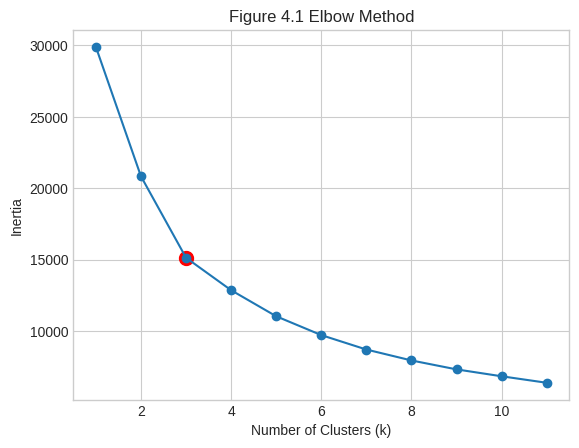

In [ ]:
inertia = []
sum_of_squared_distances = []

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k,init='random', random_state=42)
    kmeans.fit(df_senti_clu_norm)
    inertia.append(kmeans.inertia_)
    sum_of_squared_distances.append(kmeans.inertia_)

second_derivative = np.diff(np.diff(sum_of_squared_distances))
elbow_k = np.argmax(second_derivative) + 2

plt.scatter(elbow_k, sum_of_squared_distances[elbow_k - 1], c='red', label='Elbow Point', s=100)

plt.plot(range(1, 12), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Figure 4.1 Elbow Method')
plt.show()

#Coded by Madhu

We are using Elbow method to determine the optimal number of clusters we could use on our data. From Figure 4.1, we decided that we will go ahead with 3 clusters.

In [ ]:
kmeans_res_clu=KMeans(3,init='random').fit(df_senti_clu_norm)

#Coded by Madhu

In [ ]:
df_senti_clu_norm['labels']=kmeans_res_clu.labels_
df_senti_clu_norm['labels'].value_counts()

#Coded by Madhu

2    2417
0    1867
1    1697
Name: labels, dtype: int64

##4.3 Cluster Representation

In [ ]:
cluster_colors = {0: 'blue', 1: 'green', 2: 'red'}
df_senti_clu_norm['cluster_color'] = df_senti_clu_norm['labels'].map(cluster_colors)

#Coded by Madhu

Adding color to each group for easy and better interpretaion of the clusters

In [ ]:
fig=px.scatter_3d(df_senti_clu_norm, x='neg',y='neu', z='pos', color='cluster_color',symbol='labels',
                  title='Figure 4.2 Sentiment Analysis Clustering',
                  labels={'neg': 'Negative', 'neu': 'Neutral', 'pos': 'Positive', 'cluster_color': 'Cluster'},
                  width=800, height=600)
fig.update_traces(marker=dict(size=5))
fig.show()

#Coded by Madhu

In Figure 4.2, distinct clusters are evident, although they appear closely grouped in the lower negative and lower positive range.

The blue cluster displays both low negative and low positive sentiments, with the neutral scale exhibiting a linear spread.The blue cluster likely represents songs with a mixed emotional tone, where sentiments of both positivity and negativity are relatively subdued. These songs may explore themes of introspection, uncertainty, or ambivalence.  

Conversely, the red cluster shows a low positive and high negative scores with considerable variance across neutral scores.
The red cluster likely represents songs with contrasting emotions, where positivity and negativity coexist with a notable intensity. These songs may delve into themes of heartbreak, conflict, or turmoil, evoking strong emotional responses from listeners. Genres such as rock, alternative, or emotionally charged ballads might be prevalent within this cluster.

Meanwhile, the green cluster exhibits low negative and high positive scores, suggesting a diverse range of song genres.The green cluster may correspond to songs characterized by predominantly positive emotions, potentially conveying themes of happiness, love, or empowerment. These songs might belong to genres such as pop, dance, or feel-good anthems.







In [ ]:
fig = px.scatter(df_senti_clu_norm, x='neg', y='pos', color='cluster_color',
                 title='Figure 4.3 Sentiment Analysis Clustering',
                 labels={'neg': 'Negative', 'pos': 'Positive', 'cluster_color': 'Cluster'},
                 width=800, height=600)
fig.show()

#Coded by Madhu

Figure 4.3 is another representation of clusters in 2D against positive and negative

#5. Classification on Sentiment Scores for Rihanna

##5.1 Data Preparation for classification

We aim to investigate whether there exists a correlation between the sentiment score of an album title and the aggregate sentiment score of the songs featured within that album.

In [ ]:
senti_Rihanna=df_concat[df_concat['Artist']=='Rihanna']

#Coded by Madhu

Filtering the data frame for the artist Rihanna. We have chosen Rihanna because from the Figure 1.2 and Figure 1.3, we see that Rihanna has considerably less null values in the data set. Since this merely an exploratory design, we chose this artist to experiment.

In [ ]:
senti_Rihanna.isna().sum()

#Coded by Madhu

Unnamed: 0     0
Artist         0
Title          0
Album         27
Year          66
Date          66
Lyric          8
dtype: int64

In [ ]:
senti_Rihanna.drop(columns=['Year','Date','Unnamed: 0'], inplace=True)

#Coded by Madhu

<ipython-input-285-accf946940c4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
senti_Rihanna_test=senti_Rihanna[senti_Rihanna['Album'].isna()]

#Coded by Madhu

In [ ]:
senti_Rihanna_test.info()

#Coded by Madhu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 253 to 651
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  27 non-null     object
 1   Title   27 non-null     object
 2   Album   0 non-null      object
 3   Lyric   27 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [ ]:
senti_Rihanna_test.to_excel('senti_Rihanna_test.xlsx', index=False)

#Coded by Madhu

In [ ]:
df_senti_Rihanna_test_update=pd.read_excel('/content/senti_Rihanna_test_update.xlsx')
df_senti_Rihanna_test_update.dropna(inplace=True)
senti_Rihanna_test=df_senti_Rihanna_test_update
senti_Rihanna_test.info()

#Coded by Madhu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  21 non-null     object
 1   Title   21 non-null     object
 2   Album   21 non-null     object
 3   Lyric   21 non-null     object
dtypes: object(4)
memory usage: 840.0+ bytes


We are creating two different data frames for test and train. The train and test split is based on the presence of null values for "Album" for the artits. This is from the thought process that we aim to uncover the relation between sentiment score of the album title and the score under the song lyrics.

We have imputed few values in the test set to cross verify the prediction and classification. We had to drop 6 entries, since we were not able to find the values online.

In [ ]:
senti_Rihanna_train=senti_Rihanna[senti_Rihanna['Album'].notna()]

#Coded by Madhu

In [ ]:
senti_Rihanna_train

#Coded by Madhu

,Artist,Title,Album,Lyric
247,Rihanna,Work,ANTI,rihanna work work work work work work he said ...
248,Rihanna,Love on the Brain,ANTI,and you got me like oh what you want from me w...
249,Rihanna,Needed Me,ANTI,yg mustard on the beat ho i was good on my o...
250,Rihanna,Stay,Unapologetic,rihanna all along it was a fever a cold sweat ...
251,Rihanna,Kiss It Better,ANTI,kiss it kiss it better baby kiss it kiss it be...
...,...,...,...,...
646,Rihanna,Russian Roulette (Chew Fu “Black Russian” Fix)...,Russian Roulette (The Remixes),and you can see my heart said im terrified pul...
647,Rihanna,Russian Roulette (Chew Fu “Aciiiid” Fix) [Dub ...,Russian Roulette (The Remixes),and you can see my heart beating you can see i...
648,Rihanna,Russian Roulette (Chew Fu “Black Russian” Fix)...,Russian Roulette (The Remixes),take a breath take it deep calm yourself he sa...
649,Rihanna,S&M (Joe Bermudez Chico Club),S&M (Remixes),rihanna feels so good being bad ohohohohoh the...


The train set for the artist is prepared in the process above.

In [ ]:
senti_Rihanna_train.dropna(inplace=True)
senti_Rihanna_score_train = senti_Rihanna_train['Lyric'].apply(calculate_sentiment_vader)
senti_Rihanna_score_train_album = senti_Rihanna_train['Album'].apply(calculate_sentiment_vader)

df_senti_Rihanna_train = pd.DataFrame(senti_Rihanna_score_train.tolist(), index=senti_Rihanna_train.index)
df_senti_Rihanna_score_train_album = pd.DataFrame(senti_Rihanna_score_train_album.tolist(), index=senti_Rihanna_train.index)

df_Rihanna_train = df_senti_Rihanna_train.join(df_senti_Rihanna_score_train_album, lsuffix='_lyric', rsuffix='_album')
df_Rihanna_train

#Coded by Madhu

<ipython-input-292-cbdc3902a322>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,neg_lyric,neu_lyric,pos_lyric,compound_lyric,neg_album,neu_album,pos_album,compound_album
247,0.203,0.710,0.088,-0.9974,1.0,0.0,0.0,-0.3182
248,0.166,0.550,0.284,0.9959,1.0,0.0,0.0,-0.3182
249,0.232,0.718,0.050,-0.9969,1.0,0.0,0.0,-0.3182
250,0.036,0.911,0.053,0.3189,0.0,1.0,0.0,0.0000
251,0.093,0.674,0.234,0.9982,1.0,0.0,0.0,-0.3182
...,...,...,...,...,...,...,...,...
646,0.125,0.875,0.000,-0.7184,0.0,1.0,0.0,0.0000
647,0.211,0.755,0.034,-0.9805,0.0,1.0,0.0,0.0000
648,0.173,0.775,0.052,-0.9830,0.0,1.0,0.0,0.0000
649,0.075,0.538,0.387,0.9996,0.0,1.0,0.0,0.0000


We calculate the "Positive", "Negative","Neutral", "Compound" sentiment score for both the lyrics and album. Here the target variable will be "compound_album" as it is a linear summation of "Positive", "Negative" and "Neutral" values of Album.

In [ ]:
df_Rihanna_train['compound_album']=df_Rihanna_train['compound_album'].apply(lambda x: 1 if x >= 0 else 0)
df_Rihanna_train

#Coded by Madhu

,neg_lyric,neu_lyric,pos_lyric,compound_lyric,neg_album,neu_album,pos_album,compound_album
247,0.203,0.710,0.088,-0.9974,1.0,0.0,0.0,0
248,0.166,0.550,0.284,0.9959,1.0,0.0,0.0,0
249,0.232,0.718,0.050,-0.9969,1.0,0.0,0.0,0
250,0.036,0.911,0.053,0.3189,0.0,1.0,0.0,1
251,0.093,0.674,0.234,0.9982,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
646,0.125,0.875,0.000,-0.7184,0.0,1.0,0.0,1
647,0.211,0.755,0.034,-0.9805,0.0,1.0,0.0,1
648,0.173,0.775,0.052,-0.9830,0.0,1.0,0.0,1
649,0.075,0.538,0.387,0.9996,0.0,1.0,0.0,1


In [ ]:
senti_Rihanna_score_test = senti_Rihanna_test['Lyric'].apply(calculate_sentiment_vader)

df_senti_Rihanna_test = pd.DataFrame(senti_Rihanna_score_test.tolist(), index=senti_Rihanna_test.index)

df_Rihanna_test = df_senti_Rihanna_test
df_Rihanna_test.info()

#Coded by Madhu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 26
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   neg       21 non-null     float64
 1   neu       21 non-null     float64
 2   pos       21 non-null     float64
 3   compound  21 non-null     float64
dtypes: float64(4)
memory usage: 840.0 bytes


In [ ]:
df_Rihanna_test['compound']=df_Rihanna_test['compound'].apply(lambda x: 1 if x >= 0 else 0)
df_Rihanna_test['compound']

#Coded by Madhu

0     0
1     1
2     1
3     1
4     0
6     1
7     0
9     1
11    1
12    1
13    0
14    1
16    0
17    1
18    1
19    1
20    1
21    1
22    0
23    0
26    1
Name: compound, dtype: int64

In [ ]:
print("Class Distribution")
df_Rihanna_test['compound'].value_counts()

#Coded by Madhu

Class Distribution


1    14
0     7
Name: compound, dtype: int64

Here we convert the data into binary for the ease of processing.

In [ ]:
X_train=df_Rihanna_train[['neg_lyric','neu_lyric','pos_lyric']]
y_train=df_Rihanna_train['compound_album']
X_test=df_Rihanna_test[['neg','neu','pos']]
X_test = X_test.rename(columns={'neg': 'neg_lyric', 'neu': 'neu_lyric', 'pos': 'pos_lyric'})
y_test=df_Rihanna_test['compound']

#Coded by Madhu

##5.2 Correlation Inference

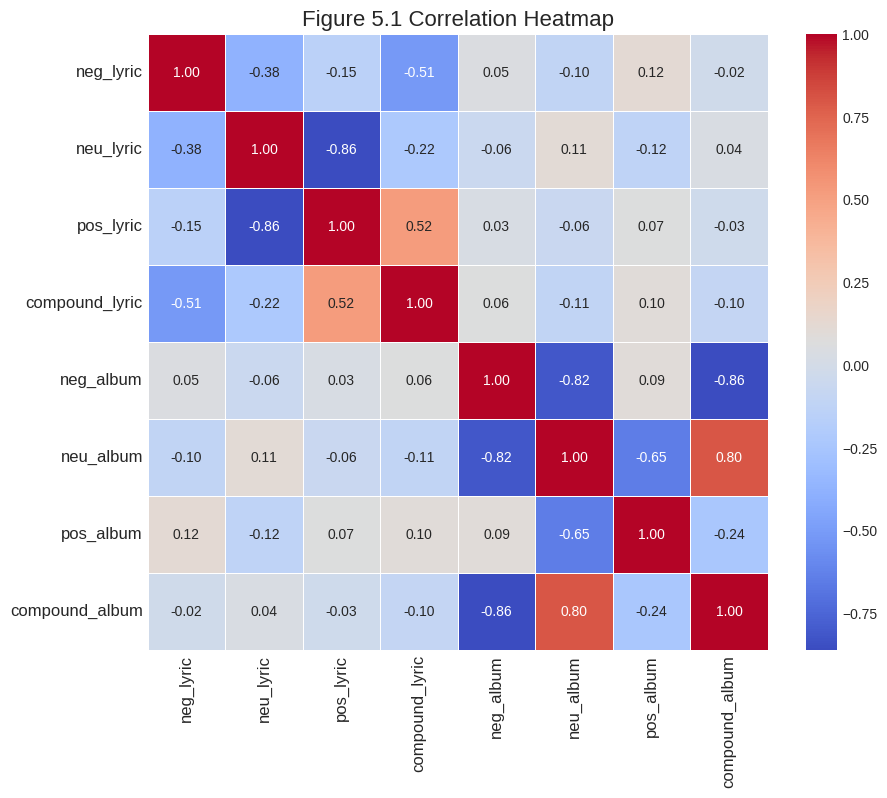

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_Rihanna_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Figure 5.1 Correlation Heatmap', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#Coded by Himani

Figure 5.1 represents the correlation between the different independent variables like "Positive", "Negative","Neutral", "Compound" and the target variable "compound_album". We observe that there are no distinct correlation between the independent variables and the dependent variables.

##5.3 Classifier and Reports

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Coded by Himani

Accuracy: 0.5238095238095238


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      0.79      0.69        14

    accuracy                           0.52        21
   macro avg       0.31      0.39      0.34        21
weighted avg       0.41      0.52      0.46        21



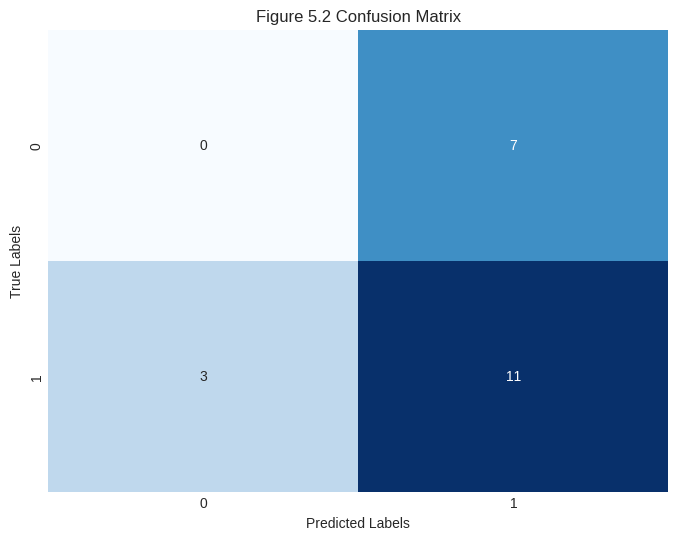

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Figure 5.2 Confusion Matrix')
plt.show()

#Coded by Himani

From this classification report, we can draw several insights about the performance of the model:

1. **Class Imbalance**: There is a very clear class imbalance, with only 7 instances of class 0 compared to 14 instances of class 1 in a ratio of 1:2.  This imbalance has skewed the evaluation metrics for the minority class 0.

2. **Better Performance for Class 1**: The model performs decent for the majority class, label 1. The precision, recall, and F1-score are 0.61, 0.79, and 0.69, respectively.

3. **Poor Performance for Minority Class**: From the class imbalance, we see that it has affected the performance for the class 0.The precision, recall, and F1-score are 0 for all. This suggests that the model struggles to correctly classify instances belonging to class 0.

4. **Overall Accuracy**: The overall accuracy of the model is 0.52. This is dangerously close to classification on random chance, which makes it not fit for practical purposes.

5. **Room for Improvement**: The classification report highlights the need for improvement in predicting class 0, possibly through strategies such as addressing class imbalance like SMOT, feature engineering, or using more sophisticated algorithms.

#Final Statements

While this analysis provides insights into the overall sentiment tendencies of the music analyzed, it can not be taken as a definitive interpretation of the artistic content or the emotional response it evokes in listeners.

To get more accurate insights, this project should be scaled with more sophisticated algorithms and machines.

#Acknowledgments

We acknowledge the use and help of various resouces available on blackboard, github, lecture notes and online resources

**References from ChatGPT**

1. For annotation in Figure 2.2
2. For lyrics combining in word cloud
3. Regressor line in Figure 3.3

**Our other references include**

1. Python Documentation
2. GeekforGeeks
3. DataCamp
4. Professor lab notes
5. News and articles for cross verification.